# Multi-Class Neural Network Classification System

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1iec7eG2j1pPpUoNi9lrr67iHtalXXRPk)

## Project Overview

Implementation of a multi-class neural network classifier from scratch using TensorFlow primitives for complete CIFAR-10 dataset classification. This project demonstrates advanced deep learning concepts including softmax activation, cross-entropy loss, one-hot encoding, and multi-class backpropagation without using high-level neural network frameworks.

## Contributors
- Abolfazl Ranjbar - [GitHub](https://github.com/ImRanjbar)
- Miaad Kimiagari - [GitHub](https://github.com/Miaad2004)
- Taha Najaf - [GitHub](https://github.com/taha-najaf)

## Objectives

- Implement multi-class neural network using TensorFlow core operations
- Apply classification to full CIFAR-10 dataset (10-class problem)
- Demonstrate softmax activation and cross-entropy loss functions
- Implement one-hot encoding for multi-class target representation
- Evaluate comprehensive classification performance across all object categories

## Technical Architecture

**Network Structure**: Input Layer (3072) → Hidden Layer (128 neurons) → Output Layer (10 classes)  
**Hidden Activation**: Sigmoid function with derivative computation  
**Output Activation**: Softmax for multi-class probability distribution  
**Loss Function**: Categorical Cross-Entropy with numerical stability  
**Optimization**: Mini-batch Gradient Descent with Xavier weight initialization  
**Target Encoding**: One-hot vectors for multi-class representation  
**Implementation**: TensorFlow Variables and core mathematical operations

## Dataset Preparation and Multi-Class Encoding

Loading complete CIFAR-10 dataset for 10-class object recognition. The preprocessing pipeline includes one-hot encoding for categorical targets, pixel normalization, and image flattening for multi-class neural network compatibility.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

# one hot
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# normalize and flatten images
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0

## Multi-Class Neural Network Architecture

Complete implementation of multi-class classification neural network featuring softmax output layer, categorical cross-entropy loss, and comprehensive backpropagation for 10-class problem. The architecture includes Xavier initialization, numerical stability measures, and efficient batch processing for large-scale training.

In [8]:
import tensorflow as tf
from tqdm import trange

class MultiClassNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Xavier/Glorot initialization
        self.W1 = tf.Variable(tf.random.normal((input_size, hidden_size), stddev=tf.sqrt(2.0 / (input_size + hidden_size))))
        self.b1 = tf.Variable(tf.zeros((1, hidden_size)))
        self.W2 = tf.Variable(tf.random.normal((hidden_size, output_size), stddev=tf.sqrt(2.0 / (hidden_size + output_size))))
        self.b2 = tf.Variable(tf.zeros((1, output_size)))

    def sigmoid(self, x):
        return tf.math.sigmoid(x)

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_x = tf.exp(x - tf.reduce_max(x, axis=1, keepdims=True))
        return exp_x / tf.reduce_sum(exp_x, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        eps = 1e-15
        y_pred = tf.clip_by_value(y_pred, eps, 1 - eps)
        return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))

    def forward(self, X):
        self.z1 = tf.matmul(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = tf.matmul(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)

        return self.a2

    def backpropagation(self, X, y, y_pred, learning_rate):
        batch_size = tf.cast(tf.shape(X)[0], tf.float32)

        delta_output = y_pred - y
        delta_hidden = tf.matmul(delta_output, tf.transpose(self.W2)) * self.sigmoid_derivative(self.a1)

        dW2 = tf.matmul(tf.transpose(self.a1), delta_output) / batch_size
        db2 = tf.reduce_mean(delta_output, axis=0, keepdims=True)
        dW1 = tf.matmul(tf.transpose(X), delta_hidden) / batch_size
        db1 = tf.reduce_mean(delta_hidden, axis=0, keepdims=True)

        self.W2.assign_sub(learning_rate * dW2)
        self.b2.assign_sub(learning_rate * db2)
        self.W1.assign_sub(learning_rate * dW1)
        self.b1.assign_sub(learning_rate * db1)

    def train(self, X, y, epochs=20, batch_size=128, learning_rate=0.01):
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        y = tf.convert_to_tensor(y, dtype=tf.float32)
        n_samples = X.shape[0]
        loss_history = []

        progress = trange(epochs, desc="Training")
        for epoch in progress:
            indices = tf.random.shuffle(tf.range(n_samples))
            X_shuffled = tf.gather(X, indices)
            y_shuffled = tf.gather(y, indices)

            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                y_pred = self.forward(X_batch)
                self.backpropagation(X_batch, y_batch, y_pred, learning_rate)

            y_pred = self.forward(X)
            loss = self.cross_entropy_loss(y, y_pred).numpy()
            loss_history.append(loss)

            progress.set_postfix({"loss": f"{loss:.4f}"})

        return loss_history

    def predict(self, X):
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        return self.forward(X)

    def predict_classes(self, X):
        return tf.argmax(self.predict(X), axis=1).numpy()


## Model Training and Loss Optimization

Training the multi-class neural network with 128 hidden neurons on CIFAR-10 subset using cross-entropy loss minimization. The training process includes 1000 epochs with mini-batch processing, learning rate optimization, and real-time loss visualization for convergence analysis.

Training: 100%|██████████| 1000/1000 [04:00<00:00,  4.15it/s, loss=1.3323]


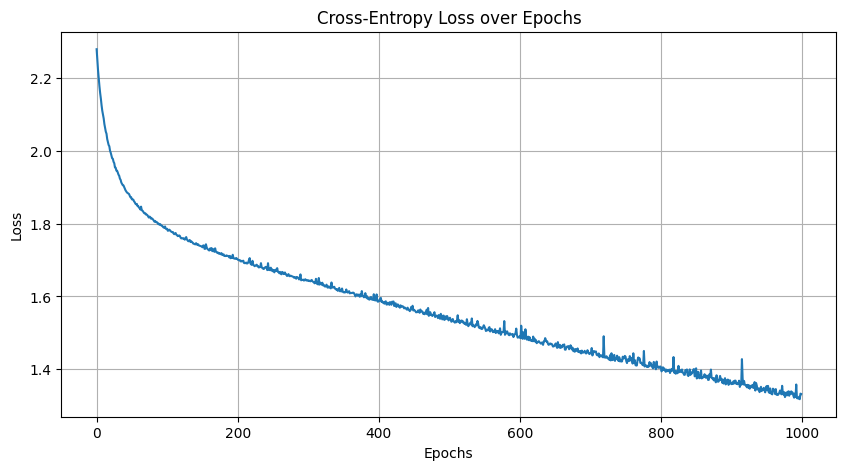

In [9]:
input_size = x_train_flat.shape[1]  # 3072 for CIFAR-10
hidden_size = 128
output_size = 10  # 10 classes

model = MultiClassNN(input_size, hidden_size, output_size)

subset_size = 10000
loss_history = model.train(
    x_train_flat[:subset_size],
    y_train_one_hot[:subset_size],
    epochs=1000,
    batch_size=256,
    learning_rate=0.01
)


plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('Cross-Entropy Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Multi-Class Performance Evaluation

Comprehensive evaluation of the trained neural network on CIFAR-10 test dataset including detailed classification report with precision, recall, and F1-scores for all 10 object categories. The evaluation demonstrates the model's capability in handling complex multi-class image recognition tasks.

In [10]:
from sklearn.metrics import classification_report

# Evaluate model
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51      1000
           1       0.53      0.51      0.52      1000
           2       0.35      0.28      0.31      1000
           3       0.34      0.23      0.28      1000
           4       0.33      0.43      0.37      1000
           5       0.44      0.25      0.32      1000
           6       0.47      0.47      0.47      1000
           7       0.40      0.59      0.47      1000
           8       0.56      0.58      0.57      1000
           9       0.49      0.43      0.46      1000

    accuracy                           0.44     10000
   macro avg       0.44      0.44      0.43     10000
weighted avg       0.44      0.44      0.43     10000

